In [1]:
import os
os.environ['PYSPARK_PYTHON']= 'python'

In [3]:
from pyspark.sql import SparkSession

In [4]:
from pyspark.sql.functions import col,mean,stddev,min,max,count

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

In [17]:
spark = SparkSession.builder.appName("visualize").getOrCreate()

25/12/01 09:46:33 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [10]:
anscombe_data = [

    (10.0, 8.04, 10.0, 9.14, 10.0, 7.46, 8.0, 6.58),

    (8.0, 6.95, 8.0, 8.14, 8.0, 6.77, 8.0, 5.76),

    (13.0, 7.58, 13.0, 8.74, 13.0, 12.74, 8.0, 7.71),

    (9.0, 8.81, 9.0, 8.77, 9.0, 7.11, 8.0, 8.84),

    (11.0, 8.33, 11.0, 9.26, 11.0, 7.81, 8.0, 8.47),

    (14.0, 9.96, 14.0, 8.10, 14.0, 8.84, 8.0, 7.04),

    (6.0, 7.24, 6.0, 6.13, 6.0, 6.08, 8.0, 5.25),

    (4.0, 4.26, 4.0, 3.10, 4.0, 5.39, 19.0, 12.50),

    (12.0, 10.84, 12.0, 9.13, 12.0, 8.15, 8.0, 5.56),

    (7.0, 4.82, 7.0, 7.26, 7.0, 6.42, 8.0, 7.91),

    (5.0, 5.68, 5.0, 4.74, 5.0, 5.73, 8.0, 6.89)

]

In [20]:
columns=['x1','y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']


In [29]:
anscombe_df = spark.createDataFrame(anscombe_data, columns)
anscombe_df.show()


+----+-----+----+----+----+-----+----+----+
|  x1|   y1|  x2|  y2|  x3|   y3|  x4|  y4|
+----+-----+----+----+----+-----+----+----+
|10.0| 8.04|10.0|9.14|10.0| 7.46| 8.0|6.58|
| 8.0| 6.95| 8.0|8.14| 8.0| 6.77| 8.0|5.76|
|13.0| 7.58|13.0|8.74|13.0|12.74| 8.0|7.71|
| 9.0| 8.81| 9.0|8.77| 9.0| 7.11| 8.0|8.84|
|11.0| 8.33|11.0|9.26|11.0| 7.81| 8.0|8.47|
|14.0| 9.96|14.0| 8.1|14.0| 8.84| 8.0|7.04|
| 6.0| 7.24| 6.0|6.13| 6.0| 6.08| 8.0|5.25|
| 4.0| 4.26| 4.0| 3.1| 4.0| 5.39|19.0|12.5|
|12.0|10.84|12.0|9.13|12.0| 8.15| 8.0|5.56|
| 7.0| 4.82| 7.0|7.26| 7.0| 6.42| 8.0|7.91|
| 5.0| 5.68| 5.0|4.74| 5.0| 5.73| 8.0|6.89|
+----+-----+----+----+----+-----+----+----+



In [30]:
dataset1 = anscombe_df.select('x1', 'y1')
dataset1.show()

+----+-----+
|  x1|   y1|
+----+-----+
|10.0| 8.04|
| 8.0| 6.95|
|13.0| 7.58|
| 9.0| 8.81|
|11.0| 8.33|
|14.0| 9.96|
| 6.0| 7.24|
| 4.0| 4.26|
|12.0|10.84|
| 7.0| 4.82|
| 5.0| 5.68|
+----+-----+



In [31]:
summary = dataset1.select(mean('x1'), stddev('x1'), min('x1'), mean('y1'), stddev('y1'))

In [32]:
dataset1_pd = dataset1.toPandas()

In [33]:
dataset1_pd.describe()

,x1,y1
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [34]:
#correlation 

In [37]:
correlation=np.corrcoef(dataset1_pd['x1'], dataset1_pd['y1'])
correlation

array([[1.        , 0.81642052],
       [0.81642052, 1.        ]])

In [38]:
correlation = correlation[0,1]
correlation

0.81642051634484

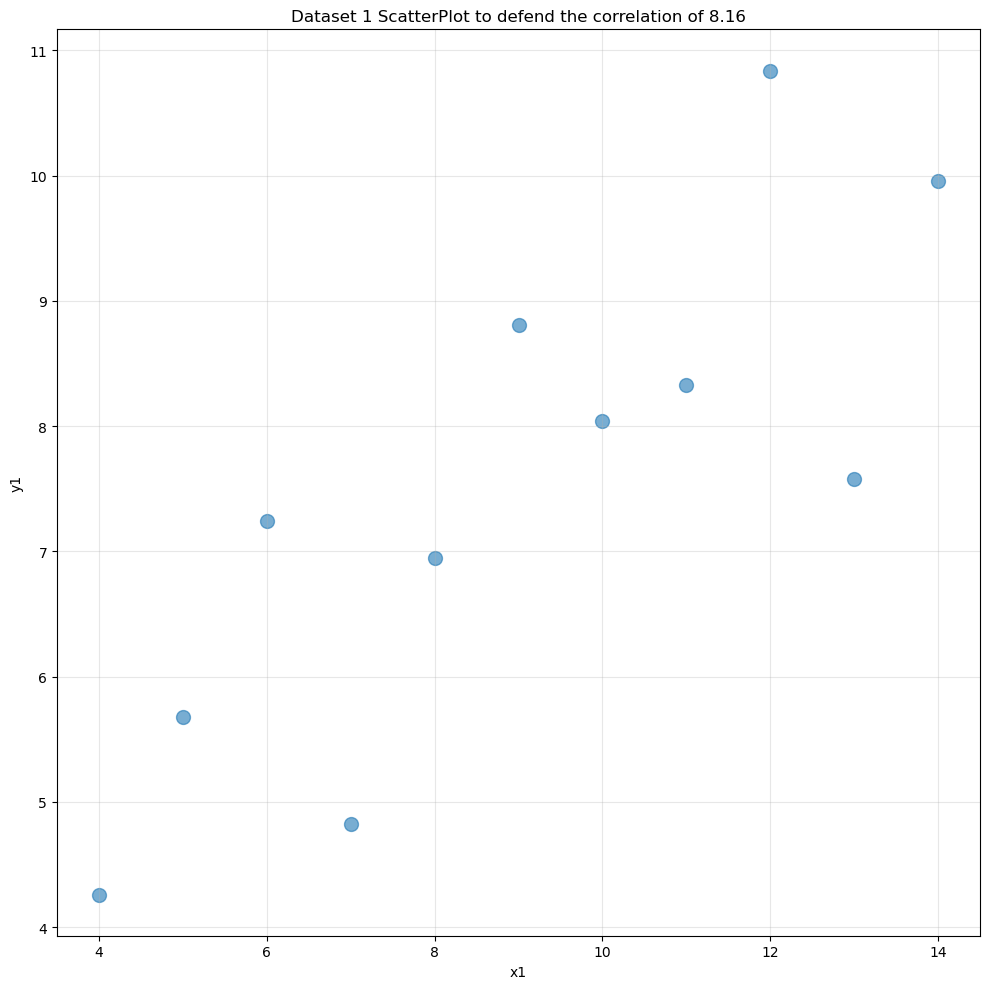

In [42]:
plt.figure(figsize = (10,10))
plt.scatter(dataset1_pd['x1'], dataset1_pd['y1'], alpha= 0.6, s=100)
plt.xlabel('x1')
plt.ylabel('y1')
plt.title("Dataset 1 ScatterPlot to defend the correlation of 8.16")
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
dataset2= a